<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/week3_%E6%8E%88%E6%A5%AD%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

問題1 コンペテション内容の把握

In [3]:
"""
1.Home Creditはどのような企業か
→前向きで安全な借入体験を提供することにより、銀行口座を持たない人々の金融包摂を拡大する企業
2.このコンペテションでは何を予測するか
→電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測する
3.それを予測することで企業が得られるメリットは
→元本が返済される確率が高まる
"""


'\n1.Home Creditはどのような企業か\n→前向きで安全な借入体験を提供することにより、銀行口座を持たない人々の金融包摂を拡大する企業\n2.このコンペテションでは何を予測するか\n→電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測する\n3.それを予測することで企業が得られるメリットは\n→元本が返済される確率が高まる\n'

In [4]:
#データセットの準備
import pandas as pd 
train= pd.read_csv('drive/My Drive/DIVE INTO CODE/0_課題/2_week3/授業課題/data/application_train.csv')
print(train)

        SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
0           100002  ...                         1.0
1           100003  ...                         0.0
2           100004  ...                         0.0
3           100006  ...                         NaN
4           100007  ...                         0.0
...            ...  ...                         ...
307506      456251  ...                         NaN
307507      456252  ...                         NaN
307508      456253  ...                         1.0
307509      456254  ...                         0.0
307510      456255  ...                         1.0

[307511 rows x 122 columns]


問題2 データ概観の把握

In [5]:
#先頭5行の内容把握
print(train.head())

   SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]


In [6]:
#情報の把握
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [7]:
#統計情報の把握
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [8]:
#欠損値の有無の確認

def null_check(train):
    in_t=[]
    total=[]
    missing_ratio=[]
    for i in train.columns:
      in_t.append(i)
      total.append(train[i].isnull().sum())
      missing_ratio.append(train[i].isnull().sum()/len(train)*100)
    matrix=np.array([total,missing_ratio]).T
    col=['total','missing_ratio']
    df = pd.DataFrame(matrix,columns=col, index=in_t)
    df1=df[df.total>0]
    return df1
null_check(train)

,total,missing_ratio
AMT_ANNUITY,12.0,0.003902
AMT_GOODS_PRICE,278.0,0.090403
NAME_TYPE_SUITE,1292.0,0.420148
OWN_CAR_AGE,202929.0,65.990810
OCCUPATION_TYPE,96391.0,31.345545
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519.0,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519.0,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519.0,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519.0,13.501631


282686


([<matplotlib.patches.Wedge at 0x7f4ad34cd2b0>,
 [Text(-1.0648123216659293, 0.27599768047650985, 'target_0'),
  Text(1.0648123152057372, -0.27599770540024077, 'target_1')],
 [Text(-0.5808067209086887, 0.15054418935082356, '91.9%'),
  Text(0.5808067173849475, -0.15054420294558588, '8.1%')])

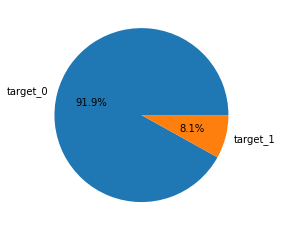

In [10]:
#クラスの割合が分かるグラフを記載
import matplotlib.pyplot as plt

#ラベル毎の個数
target_0=(train['TARGET']==0).sum()
target_1=(train['TARGET']==1).sum()

#割合
target_0_par=target_0/train.shape[0]
target_1_par=target_1/train.shape[0]

print(target_0)

plt.pie([target_0_par,target_1_par],labels=['target_0','target_1'],autopct="%1.1f%%")

問題3 課題設定

In [27]:
"""
課題1 目的変数に対して強く相関のある説明変数は何か。信用度を高める主要な要因が何か

疑問1 DAYS_BIRTH, DAYS_EMPLOYEE,DAYS_LAST_PHONE_CHANGEはなぜマイナス値なのか
 
"""


'\n課題1 目的変数に対して強く相関のある説明変数は何か。信用度を高める主要な要因が何か\n\n疑問1 DAYS_BIRTH, DAYS_EMPLOYEE,DAYS_LAST_PHONE_CHANGEはなぜマイナス値なのか\n \n'

問題4 データ探索

In [28]:
"""
#欠損値の削除

#5つ以上欠損値がある特徴量（列）は削除
train2=train.dropna(thresh=200000, axis=1)
#欠損値があるサンプル（行）は削除する
train3=train2.dropna(how='any',axis=0)
print(train3)

train3.info()

"""

"\n#欠損値の削除\n\n#5つ以上欠損値がある特徴量（列）は削除\ntrain2=train.dropna(thresh=200000, axis=1)\n#欠損値があるサンプル（行）は削除する\ntrain3=train2.dropna(how='any',axis=0)\nprint(train3)\n\ntrain3.info()\n\n"

                               corr_y
TARGET                       1.000000
DAYS_BIRTH                   0.078239
REGION_RATING_CLIENT_W_CITY  0.060893
EXT_SOURCE_1                -0.155317
EXT_SOURCE_2                -0.160472
EXT_SOURCE_3                -0.178919


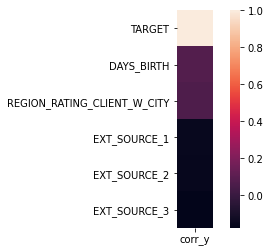

In [32]:
#各説明変数と目的変数との関係
import seaborn as ns

train3=train
#相関行列の作成
cor=train3.corr()
corr_y = pd.DataFrame({"corr_y":cor['TARGET']},index=None) #corでは文字列の列は削除されている
#print(corr_y)

#±0.5以上の特徴量を抽出→10個
select_cols = corr_y[corr_y["corr_y"].abs()>0.06]
print(select_cols)

#相関が±0.5以上のヒートマップ
ns.heatmap(select_cols,
            square=True,
            xticklabels=select_cols.columns.values,
            yticklabels=select_cols.index.values)


                               corr_y
SK_ID_CURR                   0.743804
TARGET                       1.000000
DAYS_BIRTH                   0.145222
REGION_RATING_CLIENT         0.112218
REGION_RATING_CLIENT_W_CITY  0.115207
EXT_SOURCE_1                -0.291715
EXT_SOURCE_2                -0.271615
EXT_SOURCE_3                -0.315436
DAYS_LAST_PHONE_CHANGE       0.105134


'\n【考察】\n相関係数が若干改善された\n'

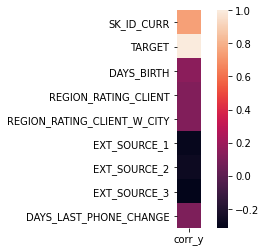

In [34]:
#Targetが0と1の数を1に併せて相関行列を作成:0の数が多いので、数の影響を取り除いてみる

y1=train3[train3['TARGET']==1]
num=y1.shape[0]

#print(y1.shape)

#y1の数に併せて0を抽出する
y0_before=train3[train3['TARGET']==0]
y0=y0_before.iloc[:num,:]
#print(y0.shape)

marge=pd.concat([y1,y0])

cor2=marge.corr()

#print(cor2)

corr_y2 = pd.DataFrame({"corr_y":cor2['TARGET']},index=None) #corでは文字列の列は削除されている
#print(corr_y)

#±0.5以上の特徴量を抽出→10個
select_cols2 = corr_y2[corr_y2["corr_y"].abs()>0.1]
print(select_cols2)

#相関が±0.5以上のヒートマップ
ns.heatmap(select_cols2,
            square=True,
            xticklabels=select_cols2.columns.values,
            yticklabels=select_cols2.index.values)
"""
【考察】
相関係数が若干改善された
"""

-16140.312104733131
-14884.82807653575


<BarContainer object of 2 artists>

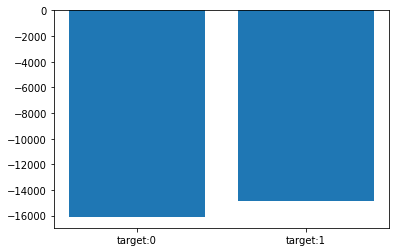

In [35]:
#TRARGETの0と1毎の説明変数の平均値を棒グラフを可視化
#target0と1であまり差はない

import matplotlib.pyplot as plt

#DAYS_BIRTH
name='DAYS_BIRTH'
y0_1=y0.loc[:,name].mean()
y1_1=y1.loc[:,name].mean()

print(y0_1)
print(y1_1)

x=['target:0','target:1']
y=[y0_1,y1_1]

plt.bar(x,y)


2.039274924471299
2.1536354481369586


<BarContainer object of 2 artists>

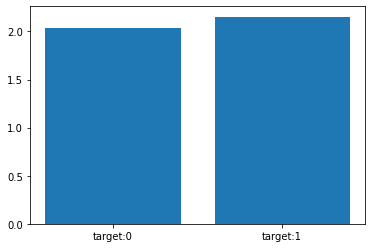

In [38]:
#REGION_RATING_CLIENT
#住地域の評価が高い程、若干、貸し倒れになりやすい傾向

name='REGION_RATING_CLIENT'
y0_3=y0.loc[:,name].mean()
y1_3=y1.loc[:,name].mean()

print(y0_3)
print(y1_3)

x=['target:0','target:1']
y=[y0_3,y1_3]

plt.bar(x,y)

2.0186505538771398
2.1348237663645517


<BarContainer object of 2 artists>

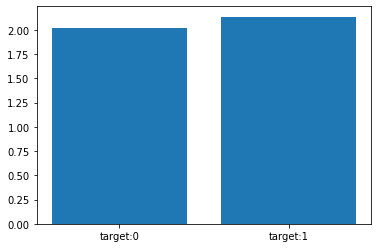

In [39]:
#REGION_RATING_CLIENT_W_CITY

name='REGION_RATING_CLIENT_W_CITY'
y0_4=y0.loc[:,name].mean()
y1_4=y1.loc[:,name].mean()

print(y0_4)
print(y1_4)

x=['target:0','target:1']
y=[y0_4,y1_4]

plt.bar(x,y)

0.513057928455802
0.3869681258823662


<BarContainer object of 2 artists>

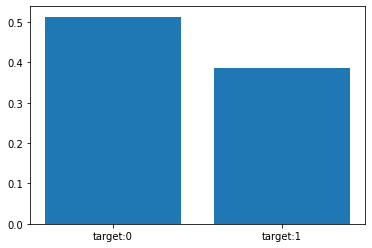

In [42]:
#EXT_SOURCE_1
#本説明変数が高いと、target0の割合が高い

import matplotlib.pyplot as plt

#EXT_SOURCE_1
name='EXT_SOURCE_1'
y0_5=y0.loc[:,name].mean()
y1_5=y1.loc[:,name].mean()

print(y0_5)
print(y1_5)

x=['target:0','target:1']
y=[y0_5,y1_5]

plt.bar(x,y)

0.5237220409369434
0.4109349069691106


<BarContainer object of 2 artists>

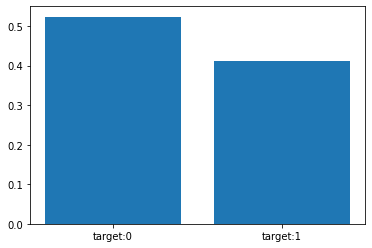

In [43]:
#EXT_SOURCE_2
#外部データソースのスコアが高い程貸し倒れリスクは低い傾向

name='EXT_SOURCE_2'
y0_6=y0.loc[:,name].mean()
y1_6=y1.loc[:,name].mean()

print(y0_6)
print(y1_6)

x=['target:0','target:1']
y=[y0_6,y1_6]

plt.bar(x,y)

0.5221881298170749
0.39071659090048283


<BarContainer object of 2 artists>

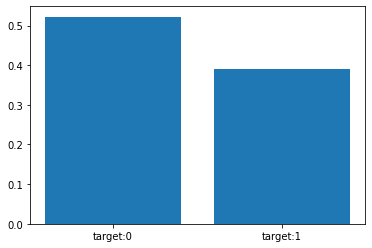

In [44]:
#EXT_SOURCE_3
#外部データソースのスコアが高い程貸し倒れリスクは低い傾向

name='EXT_SOURCE_3'
y0_7=y0.loc[:,name].mean()
y1_7=y1.loc[:,name].mean()

print(y0_7)
print(y1_7)

x=['target:0','target:1']
y=[y0_7,y1_7]

plt.bar(x,y)

-976.973171124718
-808.7968177240684


<BarContainer object of 2 artists>

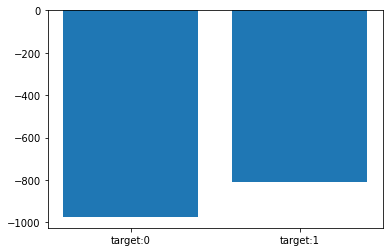

In [45]:
#DAYS_LAST_PHONE_CHANGE 
#日数が多い程、貸し倒れリスクは低くなる傾向
name='DAYS_LAST_PHONE_CHANGE'
y0_8=y0.loc[:,name].mean()
y1_8=y1.loc[:,name].mean()

print(y0_8)
print(y1_8)

x=['target:0','target:1']
y=[y0_8,y1_8]

plt.bar(x,y)

In [15]:

#異常値の除去　上記DAYS_BIRTH,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE はマイナス、且つ桁がおかしいのではと思い、外れ値があれば修正する


def fix(df,i):
  col = df.loc[:,i]

          # 四分位数
  q1 = col.describe()['25%']
  q3 = col.describe()['75%']
  iqr = q3 - q1 #四分位範囲

  # 外れ値の基準点
  outlier_min = q1 - (iqr) * 1.5
  outlier_max = q3 + (iqr) * 1.5

  # 範囲から外れている値を除く
  col[col < outlier_min] = None
  col[col > outlier_max] = None
  return df




In [16]:
#異常値除去後のグラフ

-16140.312104733131
-14884.82807653575


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: Se

<BarContainer object of 2 artists>

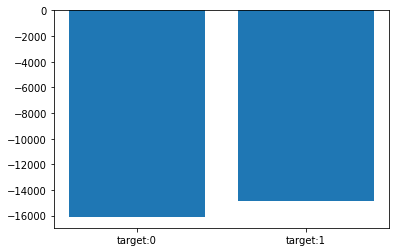

In [51]:
i='DAYS_BIRTH'
#異常値除去前と変化なし

y1_new=fix(y1,i=i)
y0_new=fix(y0,i=i)
y1_mean1=y1_new.loc[:,i].mean()
y0_mean1=y0_new.loc[:,i].mean()

print(y0_mean1)
print(y1_mean1)

x_new=['target:0','target:1']
y_new=[y0_mean1,y1_mean1]

plt.bar(x_new,y_new)

2.0
2.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: Se

<BarContainer object of 2 artists>

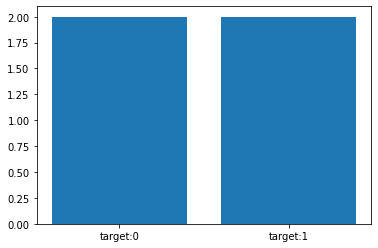

In [52]:
i='REGION_RATING_CLIENT'
#異常値除去するとtarget0と1で傾向が変わらなくなる

y1_new2=fix(y1,i=i)
y0_new2=fix(y0,i=i)
y1_mean2=y1_new2.loc[:,i].mean()
y0_mean2=y0_new2.loc[:,i].mean()

print(y0_mean2)
print(y1_mean2)

x_new=['target:0','target:1']
y_new=[y0_mean2,y1_mean2]

plt.bar(x_new,y_new)

2.0
2.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: Se

<BarContainer object of 2 artists>

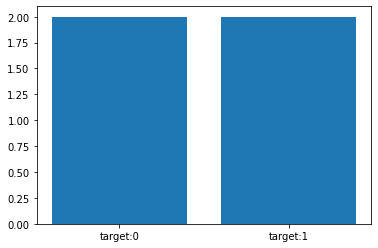

In [53]:
i='REGION_RATING_CLIENT_W_CITY'
#異常値除去するとtarget0と1で傾向が変わらなくなる

y1_new3=fix(y1,i=i)
y0_new3=fix(y0,i=i)
y1_mean3=y1_new3.loc[:,i].mean()
y0_mean3=y0_new3.loc[:,i].mean()

print(y0_mean3)
print(y1_mean3)

x_new=['target:0','target:1']
y_new=[y0_mean3,y1_mean3]

plt.bar(x_new,y_new)

0.513057928455802
0.3869681258823662


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: Se

<BarContainer object of 2 artists>

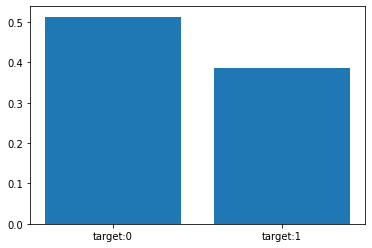

In [54]:
i='EXT_SOURCE_1'
#異常値除去前と傾向は変わらない

y1_new4=fix(y1,i=i)
y0_new4=fix(y0,i=i)
y1_mean4=y1_new4.loc[:,i].mean()
y0_mean4=y0_new4.loc[:,i].mean()

print(y0_mean4)
print(y1_mean4)

x_new=['target:0','target:1']
y_new=[y0_mean4,y1_mean4]

plt.bar(x_new,y_new)

0.5268306275933621
0.4109349069691106


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: Se

<BarContainer object of 2 artists>

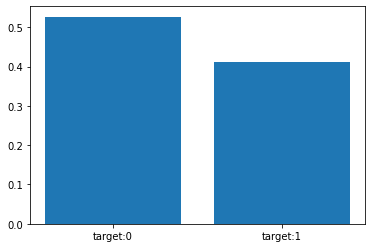

In [55]:
i='EXT_SOURCE_2'
#異常値除去前と傾向は変わらない

y1_new5=fix(y1,i=i)
y0_new5=fix(y0,i=i)
y1_mean5=y1_new5.loc[:,i].mean()
y0_mean5=y0_new5.loc[:,i].mean()

print(y0_mean5)
print(y1_mean5)

x_new=['target:0','target:1']
y_new=[y0_mean5,y1_mean5]

plt.bar(x_new,y_new)

0.5221881298170749
0.39071659090048283


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: Se

<BarContainer object of 2 artists>

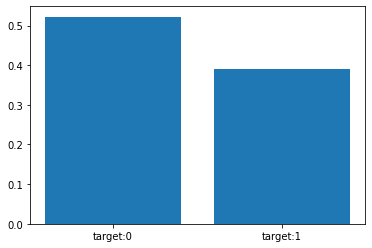

In [56]:
i='EXT_SOURCE_3'
#異常値除去前と傾向は変わらない

y1_new6=fix(y1,i=i)
y0_new6=fix(y0,i=i)
y1_mean6=y1_new6.loc[:,i].mean()
y0_mean6=y0_new6.loc[:,i].mean()

print(y0_mean6)
print(y1_mean6)

x_new=['target:0','target:1']
y_new=[y0_mean6,y1_mean6]

plt.bar(x_new,y_new)

-973.8038314176246
-778.8768308106564


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: Se

<BarContainer object of 2 artists>

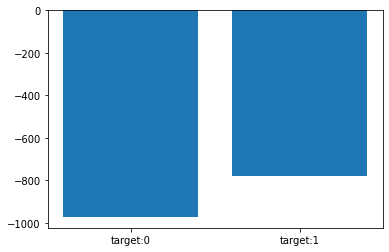

In [57]:
i='DAYS_LAST_PHONE_CHANGE'
#異常値除去前と傾向は変わらない

y1_new7=fix(y1,i=i)
y0_new7=fix(y0,i=i)
y1_mean7=y1_new7.loc[:,i].mean()
y0_mean7=y0_new7.loc[:,i].mean()

print(y0_mean7)
print(y1_mean7)

x_new=['target:0','target:1']
y_new=[y0_mean7,y1_mean7]

plt.bar(x_new,y_new)

＜課題に対する手続き＞
1.相関係数において、target1とtarget0の母数を揃えると、説明変数との相関がやや高く出たため、これを採用
2.説明変数の異常値を除去した後、説明変数の各targetのラベル毎の平均を算出して棒グラフで可視化

＜結論＞
1.貸し倒れリスクが低い要因はEXT_SOURCE_1～3とDAYS_LAST_PHONE_CHANGEの高さであると考えられる。
2.逆に貸し倒れリスクが高い（Target=1）の要因はつかめなかった